Sky Kapoor and Chris Compierchio

This program will calulate the wavefunction for the ground state and the first two excited states of an asymmetric well.

In [2]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con

PART B

In [24]:
#Define given constants
L = 5e-10
a = 1.6022e-18
M = 9.1094e-31

#Define H_mn function
def Hmn(m, n):
    if m == n:
        H = .5*a + ((np.pi**2)*(con.hbar**2)*(m**2))/(2*M*(L**2))
        return H
    elif (m + n) % 2 != 0:
        H = -(8*a*m*n)/((np.pi**2)*(m**2 - n**2)**2)
        return H
    else:
        H = 0
        return H
    
#Define function to integrate sing simpsons rule as in Lab 2
def simp(a, b, psi):
    h = (b-a)/psi.size
   
    m = (psi[0] + psi[-1])

    sum1 = 0

    for k in range(1,100,2):
        sum1 += psi[k] 

    for k in range(2,100, 2):
        sum2 = psi[k]
    
    simp = (h/3)*(m+4*sum1+2*sum2)
    
    return simp


PART C

In [25]:
#Define maximum number of indices for the H matrix
mmax, nmax = 10, 10
#Define H
H = np.empty((10, 10))
#Calculate each entry of H
for m in range(1, mmax+1):
    for n in range(1, nmax+1):
        H[m-1, n-1] = Hmn(m, n)
#Calculate the eigenvalues of H
evs = np.linalg.eigvalsh(H)
#Print results in eV
print(evs*6.241509e18)

[  5.83642783  11.18115866  18.66294388  29.14422969  42.65508159
  59.18523429  78.72930115 101.28538399 126.85123972 155.55513523]


PART D

In [26]:
#Repeat for a 100x100 matrix
mmax, nmax = 100, 100
H = np.empty((100, 100))
for m in range(1, mmax+1):
    for n in range(1, nmax+1):
        H[m-1, n-1] = Hmn(m, n)
evs = np.linalg.eigvalsh(H)
print(evs*6.241509e18)

[5.83642743e+00 1.11811573e+01 1.86629420e+01 2.91442209e+01
 4.26550725e+01 5.91851817e+01 7.87292493e+01 1.01284753e+02
 1.26850407e+02 1.55425509e+02 1.87009648e+02 2.21602574e+02
 2.59204127e+02 2.99814202e+02 3.43432724e+02 3.90059644e+02
 4.39694926e+02 4.92338541e+02 5.47990470e+02 6.06650699e+02
 6.68319215e+02 7.32996009e+02 8.00681075e+02 8.71374405e+02
 9.45075997e+02 1.02178585e+03 1.10150395e+03 1.18423030e+03
 1.26996491e+03 1.35870776e+03 1.45045885e+03 1.54521820e+03
 1.64298578e+03 1.74376161e+03 1.84754568e+03 1.95433799e+03
 2.06413855e+03 2.17694734e+03 2.29276437e+03 2.41158964e+03
 2.53342316e+03 2.65826491e+03 2.78611489e+03 2.91697312e+03
 3.05083959e+03 3.18771429e+03 3.32759723e+03 3.47048841e+03
 3.61638783e+03 3.76529548e+03 3.91721137e+03 4.07213550e+03
 4.23006786e+03 4.39100846e+03 4.55495730e+03 4.72191438e+03
 4.89187969e+03 5.06485324e+03 5.24083502e+03 5.41982505e+03
 5.60182330e+03 5.78682980e+03 5.97484453e+03 6.16586750e+03
 6.35989870e+03 6.556938

PART E

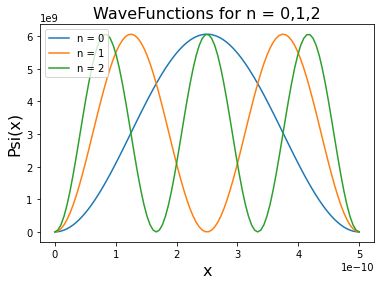

In [47]:
#Calcualte the eigenvalues and eugenvectors for H
evals, evecs = np.linalg.eigh(H)

#Define position points for the particle
x = np.linspace(0,L,100)

#Loop for n up to 3
for n in range(3):
    #Define psi
    psi = 0
    
    #Calculate psi using the eigenvectors of H
    psi += evecs[n][0]*np.sin((n+1)*np.pi*x/L)
    
    #Integrate psi
    A = simp(0, L, np.abs(psi)**2)

    #Normalize psi
    psi /= np.sqrt(A)

    #Plot results
    plt.plot(x, np.abs(psi)**2, label = "n = "+ str(n))
    plt.legend(loc = "upper left")
    plt.title("WaveFunctions for n = 0,1,2", fontsize = 16)
    plt.xlabel("x",fontsize = 16)
    plt.ylabel("Psi(x)",fontsize = 16)
plt.show()